<a href="https://colab.research.google.com/github/AliRizvi14/Machine_Learning/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [6]:
iris = load_iris()

In [70]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [71]:
df.drop('sepal length (cm)',axis= 'columns',inplace=True )

In [72]:
df.drop('sepal width (cm)',axis= 'columns',inplace=True )


In [73]:
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


Text(0, 0.5, 'Petal Width')

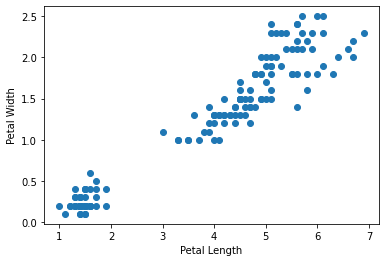

In [74]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [75]:
KM=KMeans(n_clusters=3)
y_predict=KM.fit_predict(df)
y_predict

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [76]:
df['Cluster']=y_predict
df


,petal length (cm),petal width (cm),Cluster
0,1.4,0.2,2
1,1.4,0.2,2
2,1.3,0.2,2
3,1.5,0.2,2
4,1.4,0.2,2
...,...,...,...
145,5.2,2.3,1
146,5.0,1.9,1
147,5.2,2.0,1
148,5.4,2.3,1


In [77]:
KM.cluster_centers_

array([[4.26923077, 1.34230769],
       [5.59583333, 2.0375    ],
       [1.462     , 0.246     ]])

No handles with labels found to put in legend.


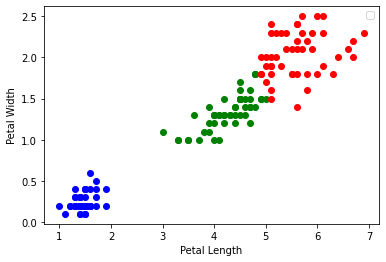

In [80]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3= df[df.Cluster==2]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='blue')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

In [87]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)
    

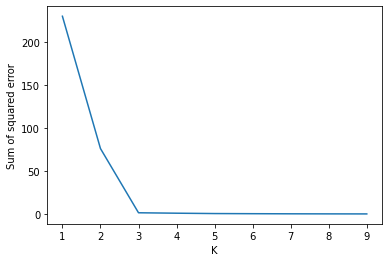

In [88]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [81]:
scaler = MinMaxScaler()

scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])

scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])

In [89]:
df

,petal length (cm),petal width (cm),Cluster,Cluster1
0,0.067797,0.041667,2,1
1,0.067797,0.041667,2,1
2,0.050847,0.041667,2,1
3,0.084746,0.041667,2,1
4,0.067797,0.041667,2,1
...,...,...,...,...
145,0.711864,0.916667,1,0
146,0.677966,0.750000,1,0
147,0.711864,0.791667,1,0
148,0.745763,0.916667,1,0


In [90]:
KM.cluster_centers_

array([[7.78954802e-01, 8.07291667e-01, 1.00000000e+00],
       [7.83050847e-02, 6.08333333e-02, 2.00000000e+00],
       [5.54106910e-01, 5.17628205e-01, 4.44089210e-16]])

Text(0, 0.5, 'Petal Width')

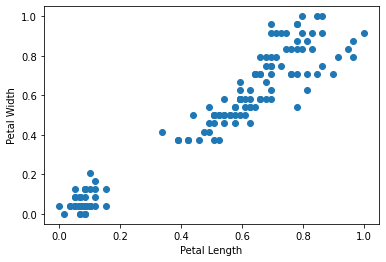

In [91]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [92]:
KM=KMeans(n_clusters=3)
y_predict=KM.fit_predict(df)
y_predict

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [93]:
df['Cluster1']=y_predict
df


,petal length (cm),petal width (cm),Cluster,Cluster1
0,0.067797,0.041667,2,2
1,0.067797,0.041667,2,2
2,0.050847,0.041667,2,2
3,0.084746,0.041667,2,2
4,0.067797,0.041667,2,2
...,...,...,...,...
145,0.711864,0.916667,1,1
146,0.677966,0.750000,1,1
147,0.711864,0.791667,1,1
148,0.745763,0.916667,1,1


In [94]:
df.drop('Cluster',axis='columns',inplace=True)

In [95]:
df

,petal length (cm),petal width (cm),Cluster1
0,0.067797,0.041667,2
1,0.067797,0.041667,2
2,0.050847,0.041667,2
3,0.084746,0.041667,2
4,0.067797,0.041667,2
...,...,...,...
145,0.711864,0.916667,1
146,0.677966,0.750000,1
147,0.711864,0.791667,1
148,0.745763,0.916667,1


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   petal length (cm)  150 non-null    float64
 1   petal width (cm)   150 non-null    float64
 2   Cluster1           150 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 3.1 KB


In [96]:
KM.cluster_centers_

array([[5.54106910e-01, 5.17628205e-01, 4.44089210e-16, 2.00000000e+00],
       [7.78954802e-01, 8.07291667e-01, 1.00000000e+00, 6.66133815e-16],
       [7.83050847e-02, 6.08333333e-02, 2.00000000e+00, 1.00000000e+00]])

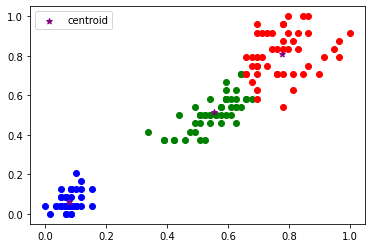

In [99]:
df1 = df[df.Cluster1==0]
df2 = df[df.Cluster1==1]
df3 = df[df.Cluster1==2]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='blue')
plt.scatter(KM.cluster_centers_[:,0],KM.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [100]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

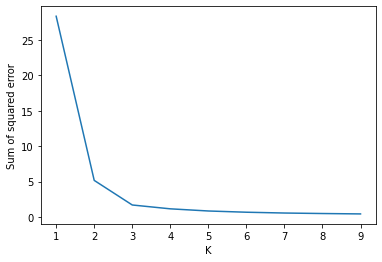

In [101]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)